# **Nama : M Jorgi Ramadhan**

**NIM : 09011381722125**

### PERANCANGAN DAN IMPLEMENTASI PROTOTIPE SISTEM PENDETEKSI ASAP DAN PANAS PADA RUANGAN TERTUTUP MENGGUNAKAN LOGIKA FUZZY METODE MAMDANI


Peristiwa kebakaran dapat terjadi di tempat umum maupun di perumahan. Tingkat kerugian
yang dihasilkan oleh bencana kebakaran tentunya sangat besar. Kebakaran yang dapat diatasi, dapat
meminimalkan kerugian yang terjadi apabila diketahui gejala-gejala akan terjadi kebakaran sejak dini.
Untuk itu dibuatlah suatu prototipe sistem pendeteksi asap dan suhu agar kerugian materiil
maupun nonmateriil dapat dihindari. Metode inferensi Fuzzy yang digunakan yaitu metode Mamdani.
Metode Mamdani digunakan sebagai dasar pemikiran untuk penentuan keluaran dari sistem ini, baik itu
berupa alarm, pompa air ataupun kipas. 


In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

### 1. Fuzzification
Fuzzification, merupakan suatu proses untuk mengubah suatu masukan dari bentuk tegas (crisp) menjadi fuzzy yang biasanya disajikan dalam bentuk himpunan-himpunan fuzzy dengan suatu fungsi kenggotaannya masing-masing.

Pada kasus kali ini menggunakan dua buah input dan dua buah output , yaitu input suhu dan asap serta output pompa dan kipas. penggunaan syntax 'Atecedent' adalah untuk input sedangkan syntax 'Cosequent'

Sensor suhu mendeteksi panas mulai 15 derajat sampai 60 derajat, sedangkan suhu yang
dianggap bahayaa dalah 31 derajat. Sensor asap mendeteksi kumpulan asap mulai 0ppm sampai
100ppm , kumpulan asap yang dianggap bahayaa dalah 36ppm. 

In [23]:
suhu = ctrl.Antecedent(np.arange(15,61,1), 'suhu')
asap = ctrl.Antecedent(np.arange(1,101,1), 'asap')
pompa = ctrl.Consequent(np.arange(1,101,1), 'pompa')
kipas = ctrl.Consequent(np.arange(1,101,1),'kipas')

### Input
penjabaran input dapat dituliskan sebagai berikut


#### SUHU

dengan menggunakan satuan celcius

**Sejuk** = 15 Celcius - 25 Celcius

**Normal** = 20 Celcius - 35 Celcius

**Hangat** = 30 Celcius - 45 Celcius

**Panas** = 40 Celcius - 60 Celcius




####  ASAP


**Renggang** = 1ppm - 40ppm

**Sedang** = 35ppm - 65ppm

**Padat** = 60ppm - 100ppm




### OUTPUT



#### Pompa


**Ready** = 1 - 50

**Medium** = 25 - 75

**Long** = 50 - 100




#### Kipas


**Standbye** = 1 - 50

**MID** = 25 - 75

**HIGH** = 50 - 100

##  FUNGSI KEANGGOTAAN SUHU

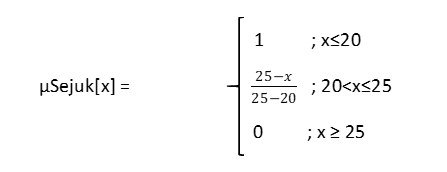

In [24]:
suhu['sejuk'] = fuzz.trapmf(suhu.universe, [15, 15, 20, 25])
suhu['normal'] = fuzz.trapmf(suhu.universe, [20, 25, 30, 35])
suhu['hangat'] = fuzz.trapmf(suhu.universe, [30, 35, 40, 45])
suhu['panas'] = fuzz.trapmf(suhu.universe, [40, 45, 60, 60])




from IPython.display import Image


Image(filename = "suhu sejuk.png")


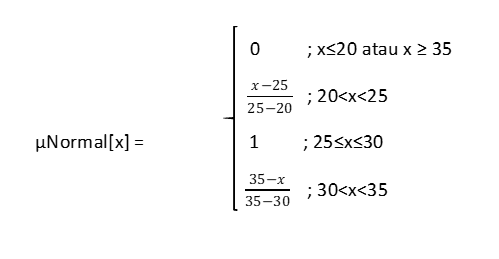

In [5]:
from IPython.display import Image


Image(filename = "suhu normal.png")

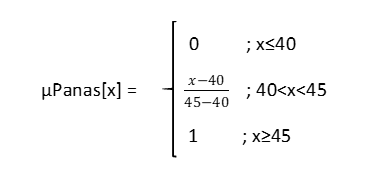

In [6]:
from IPython.display import Image


Image(filename = "suhu panas.png")


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


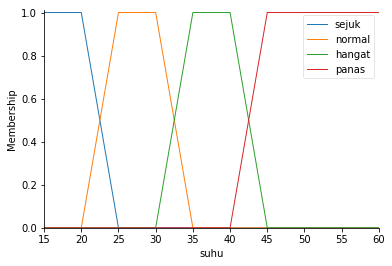

In [28]:
suhu.view()

## FUNGSI KEANGGOTAAN ASAP

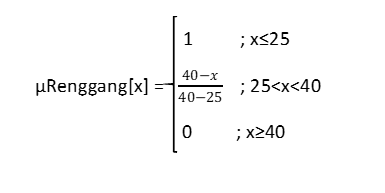

In [25]:
asap['renggang'] = fuzz.trapmf(asap.universe, [1, 1, 25, 40])
asap['sedang'] = fuzz.trimf(asap.universe, [35, 50, 65])
asap['padat'] = fuzz.trapmf(asap.universe, [60, 80, 100, 100])


from IPython.display import Image
Image(filename = "asap renggang.png")

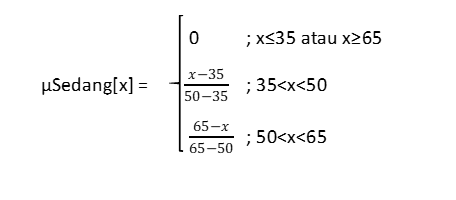

In [8]:
from IPython.display import Image


Image(filename = "asap sedang.png")

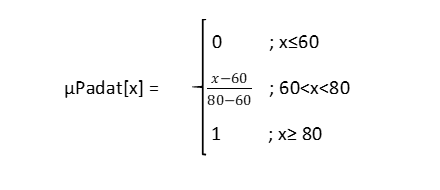

In [9]:
from IPython.display import Image


Image(filename = "asap padat.png")


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


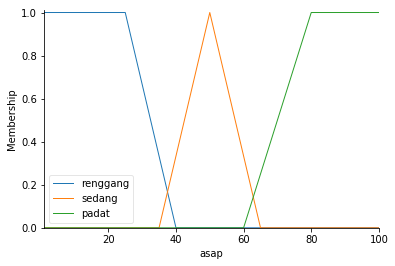

In [32]:
asap.view()

## FUNGSI KEANGGOTAAN KIPAS

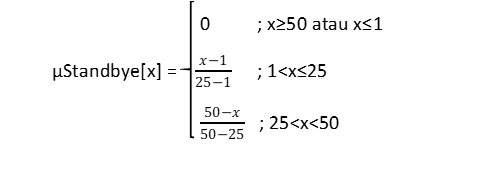

In [26]:
kipas['standbye'] = fuzz.trimf(kipas.universe, [1,25,50])
kipas['mid'] = fuzz.trimf(kipas.universe, [25, 50, 75])
kipas['high'] = fuzz.trimf(kipas.universe, [50,75,100])

from IPython.display import Image
Image(filename = "kipas standby.png")

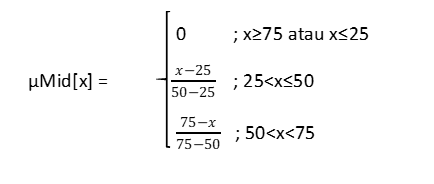

In [35]:
from IPython.display import Image
Image(filename = "kipas mid.png")

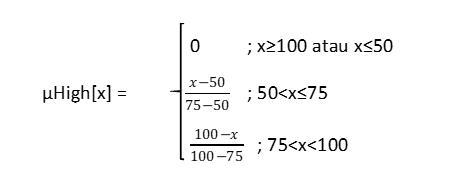

In [38]:
from IPython.display import Image
Image(filename = "pompa high.png")

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


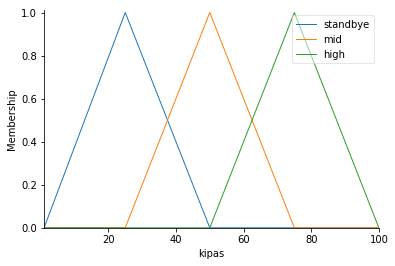

In [36]:
kipas.view()

## FUNGSI KEANGGOTAAN POMPA

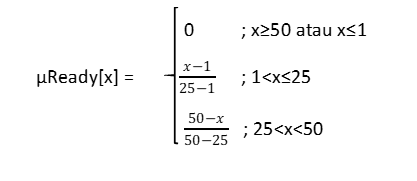

In [27]:
pompa['ready'] = fuzz.trimf(pompa.universe, [1,25,50])
pompa['medium'] = fuzz.trimf(pompa.universe, [25, 50, 75])
pompa['long'] = fuzz.trimf(pompa.universe, [50,75,100])

from IPython.display import Image
Image(filename = "output ready.png")

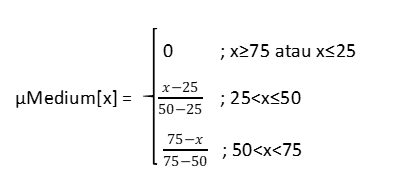

In [39]:
from IPython.display import Image
Image(filename = "pompa medium.png")

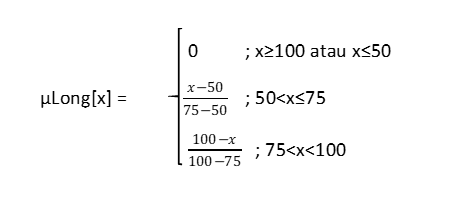

In [40]:
from IPython.display import Image
Image(filename = "pompa long.png")

## 2. Rule base

Pada kombinasi antara Fuzzy Logic dengan Rule-Based System atau disebut dengan Fuzzy Rule-Based System memungkinkan penggunaan aturan linguistik untuk menggambarkan hubungan antara parameter masukan dengan keluaran yang diharapkan dari sistem yang dibangun.
Pada kasus  kali ini terdapat 12 rule

In [28]:
rule1 = ctrl.Rule(suhu['sejuk'] & asap['renggang'],(kipas['standbye'],pompa['ready']))
rule2 = ctrl.Rule(suhu['sejuk'] & asap['sedang'],(kipas['mid'],pompa['ready']))
rule3 = ctrl.Rule(suhu['sejuk'] & asap['padat'],(kipas['high'],pompa['ready']))
rule4 = ctrl.Rule(suhu['normal'] & asap['renggang'],(kipas['standbye'],pompa['ready']))
rule5 = ctrl.Rule(suhu['normal'] & asap['sedang'],(kipas['mid'],pompa['medium']))
rule6 = ctrl.Rule(suhu['normal'] & asap['padat'],(kipas['high'],pompa['medium']))
rule7 = ctrl.Rule(suhu['hangat'] & asap['renggang'],(kipas['standbye'],pompa['medium']))
rule8 = ctrl.Rule(suhu['hangat'] & asap['sedang'],(kipas['mid'],pompa['medium']))
rule9 = ctrl.Rule(suhu['hangat'] & asap['padat'],(kipas['high'],pompa['long']))
rule10 = ctrl.Rule(suhu['panas'] & asap['renggang'],(kipas['standbye'],pompa['long']))
rule11 = ctrl.Rule(suhu['panas'] & asap['sedang'],(kipas['mid'],pompa['long']))
rule12 = ctrl.Rule(suhu['panas'] & asap['padat'],(kipas['high'],pompa['long']))

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x295033a77b8>)

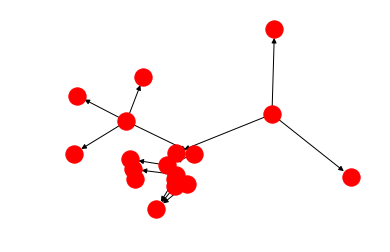

In [9]:
rule1.view()

### Membuat contoh system dengan menggabungkan rule yang ada

In [29]:
simulasi = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

#### Menggunakan mode simulasi

In [30]:
pengujian = ctrl.ControlSystemSimulation(simulasi)

#### Memasukan nilai pada variable input 

In [31]:
pengujian.input['suhu'] = 50
pengujian.input['asap'] = 45

### Menampilkan hasil komputasi

In [35]:
hasil_akhir = pengujian.compute()

hasil_akhir = pengujian.output
hasil_akhir

OrderedDict([('kipas', 50.000000000000014), ('pompa', 75.0)])

### Menampilkan titik area output dalam bentuk grafik

In [59]:
print(hasil_akhir)

OrderedDict([('kipas', 50.000000000000014), ('pompa', 75.0)])


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


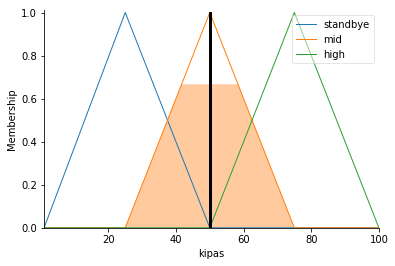

In [60]:
kipas.view(sim=pengujian)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


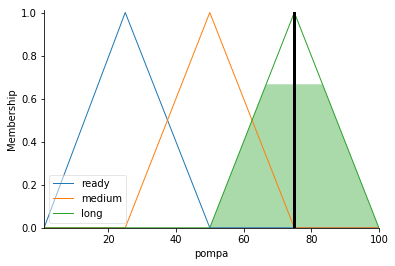

In [61]:
pompa.view(sim=pengujian)

# PERHITUNGAN MANUAL

Input suhu = 50

Input asap = 45

**Nilai Fuzzy**

-Input Suhu = 50

Berada dalam keadaan "Panas" 

Nilai fuzzynya adalah = 1

-Input Asap = 45

Berada dalam keadaan "Sedang"

Nilai fuzzynya adalah = 


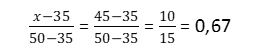

In [10]:
Image(filename = "sedang.png")

**Evaluasi Rule**

Rule yang aktif adalah

**Rule 11** : 

suhu['panas'] & asap['sedang'] = kipas['mid'] dan pompa['long']

Min (1,0.67)                   = 0,67 dan 0,67

**Menentukan Agregasi dan Hasil Fuzzyfikasi**

Daerah yang aktif berdasarkan hasil evaluasi rule dapat dilihat pada gambar hasil fuzzyfikasi sebelumnya.

Adapun hasil fuzzyfikasinya adalah

**Output Kipas**

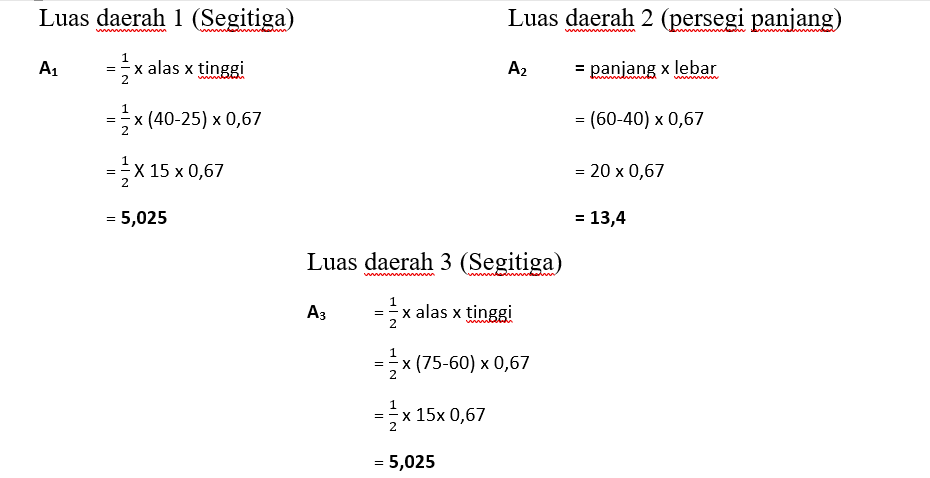

In [13]:
Image(filename = "luas.png")

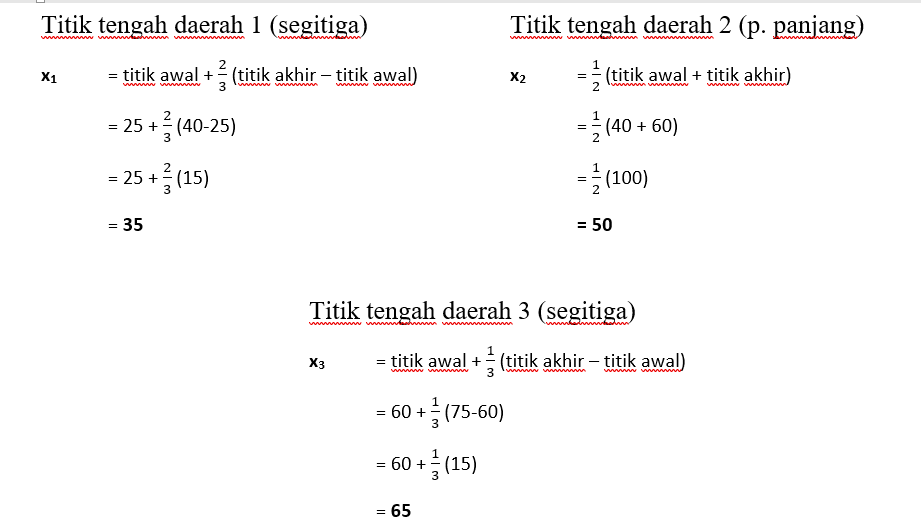

In [14]:
Image(filename = "x.png")

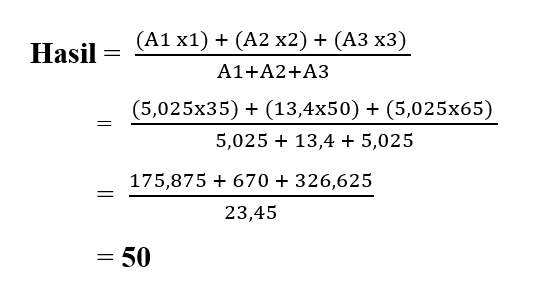

In [16]:
Image(filename = "hasil kipas.png")

**Output Pompa**

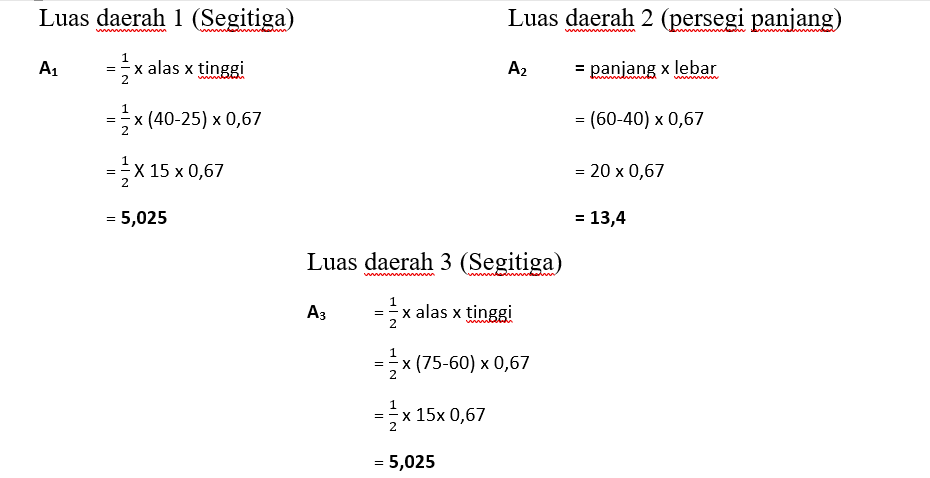

In [17]:
Image(filename = "luas.png")

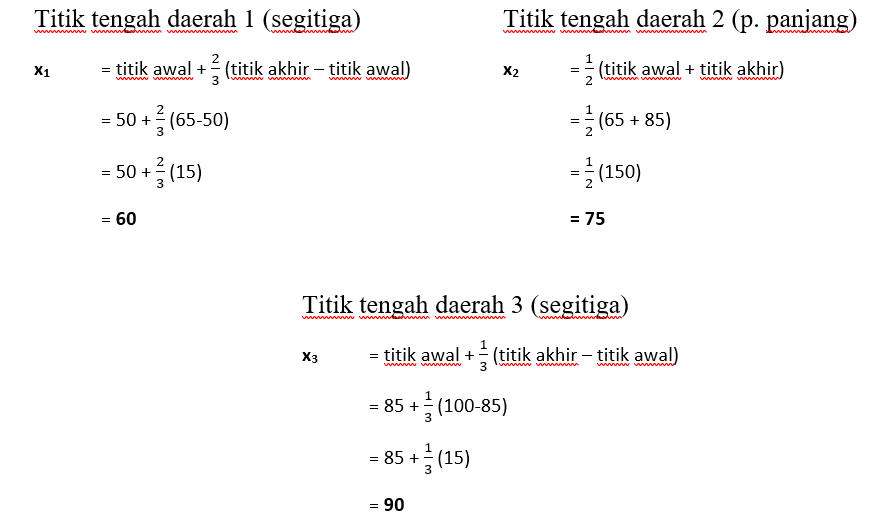

In [18]:
Image(filename = "x pompa.png")

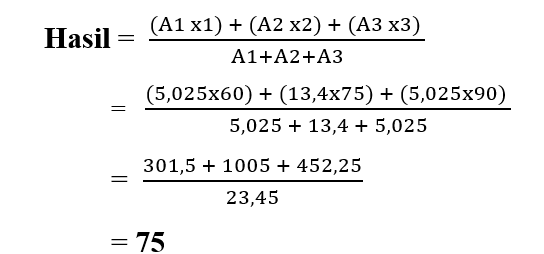

In [19]:
Image(filename = "hasil pompa.png")